In [223]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt       # matplotlib.pyplot plots data
%matplotlib inline 
import seaborn as sns

In [224]:
pdata = pd.read_csv("Bank_Personal_Loan_Modelling.csv")

In [225]:
pdata.shape # Check number of columns and rows in data frame

(5000, 14)

In [226]:
pdata.head

<bound method NDFrame.head of         ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
0        1   25           1      49     91107       4    1.6          1   
1        2   45          19      34     90089       3    1.5          1   
2        3   39          15      11     94720       1    1.0          1   
3        4   35           9     100     94112       1    2.7          2   
4        5   35           8      45     91330       4    1.0          2   
...    ...  ...         ...     ...       ...     ...    ...        ...   
4995  4996   29           3      40     92697       1    1.9          3   
4996  4997   30           4      15     92037       4    0.4          1   
4997  4998   63          39      24     93023       2    0.3          3   
4998  4999   65          40      49     90034       3    0.5          2   
4999  5000   28           4      83     92612       3    0.8          1   

      Mortgage  Personal Loan  Securities Account  CD Account  Online

In [227]:
pdata.isnull().values.any() ## null check

False

In [228]:
#Question:1
## priniting correlation between columns
pdata.corr()  
## based on below correlation matrix, some varibles are postively correalted and some are negatively correalted 

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


In [243]:
#Question:1
## droping experiencce coloumn becasue both Experience and age are highly correalted 
##By droping Experience, we can handle negative values in Experience coloumn
## droping ID column ,Experience, ZIP Code and loading into new dataframe : bankdata
bankdata = pdata.drop(['ID','Experience','ZIP Code'], axis=1) 

#making Personal Loan as categorical coloumn
bankdata['Personal Loan'] = bankdata['Personal Loan'].astype('category')

In [244]:
bankdata.head

<bound method NDFrame.head of       Age  Income  Family  CCAvg  Education  Mortgage Personal Loan  \
0      25      49       4    1.6          1         0             0   
1      45      34       3    1.5          1         0             0   
2      39      11       1    1.0          1         0             0   
3      35     100       1    2.7          2         0             0   
4      35      45       4    1.0          2         0             0   
...   ...     ...     ...    ...        ...       ...           ...   
4995   29      40       1    1.9          3         0             0   
4996   30      15       4    0.4          1        85             0   
4997   63      24       2    0.3          3         0             0   
4998   65      49       3    0.5          2         0             0   
4999   28      83       3    0.8          1         0             0   

      Securities Account  CD Account  Online  CreditCard  
0                      1           0       0           0  

In [245]:
#Question:1
bankdata.corr() # It will show correlation matrix after droping 3 columns

,Age,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Age,1.000000,-0.055269,-0.046418,-0.052012,0.041334,-0.012539,-0.000436,0.008043,0.013702,0.007681
Income,-0.055269,1.000000,-0.157501,0.645984,-0.187524,0.206806,-0.002616,0.169738,0.014206,-0.002385
Family,-0.046418,-0.157501,1.000000,-0.109275,0.064929,-0.020445,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,0.645984,-0.109275,1.000000,-0.136124,0.109905,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,-0.187524,0.064929,-0.136124,1.000000,-0.033327,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,0.206806,-0.020445,0.109905,-0.033327,1.000000,-0.005411,0.089311,-0.005995,-0.007231
Securities Account,-0.000436,-0.002616,0.019994,0.015086,-0.010812,-0.005411,1.000000,0.317034,0.012627,-0.015028
CD Account,0.008043,0.169738,0.014110,0.136534,0.013934,0.089311,0.317034,1.000000,0.175880,0.278644
Online,0.013702,0.014206,0.010354,-0.003611,-0.015004,-0.005995,0.012627,0.175880,1.000000,0.004210
CreditCard,0.007681,-0.002385,0.011588,-0.006689,-0.011014,-0.007231,-0.015028,0.278644,0.004210,1.000000


In [246]:
#Question:1
## checking number of records and percentage of personal loan coloumn out of total data 
n_true = len(bankdata.loc[bankdata['Personal Loan'] == 1])
n_false = len(bankdata.loc[bankdata['Personal Loan'] == 0])
print("Number people accepted personal loan : {0} ({1:2.2f}%)".format(n_true, (n_true / (n_true + n_false)) * 100 ))
print("Number people not accepted personal loan : {0} ({1:2.2f}%)".format(n_false, (n_false / (n_true + n_false)) * 100))

Number people accepted personal loan : 480 (9.60%)
Number people not accepted personal loan : 4520 (90.40%)


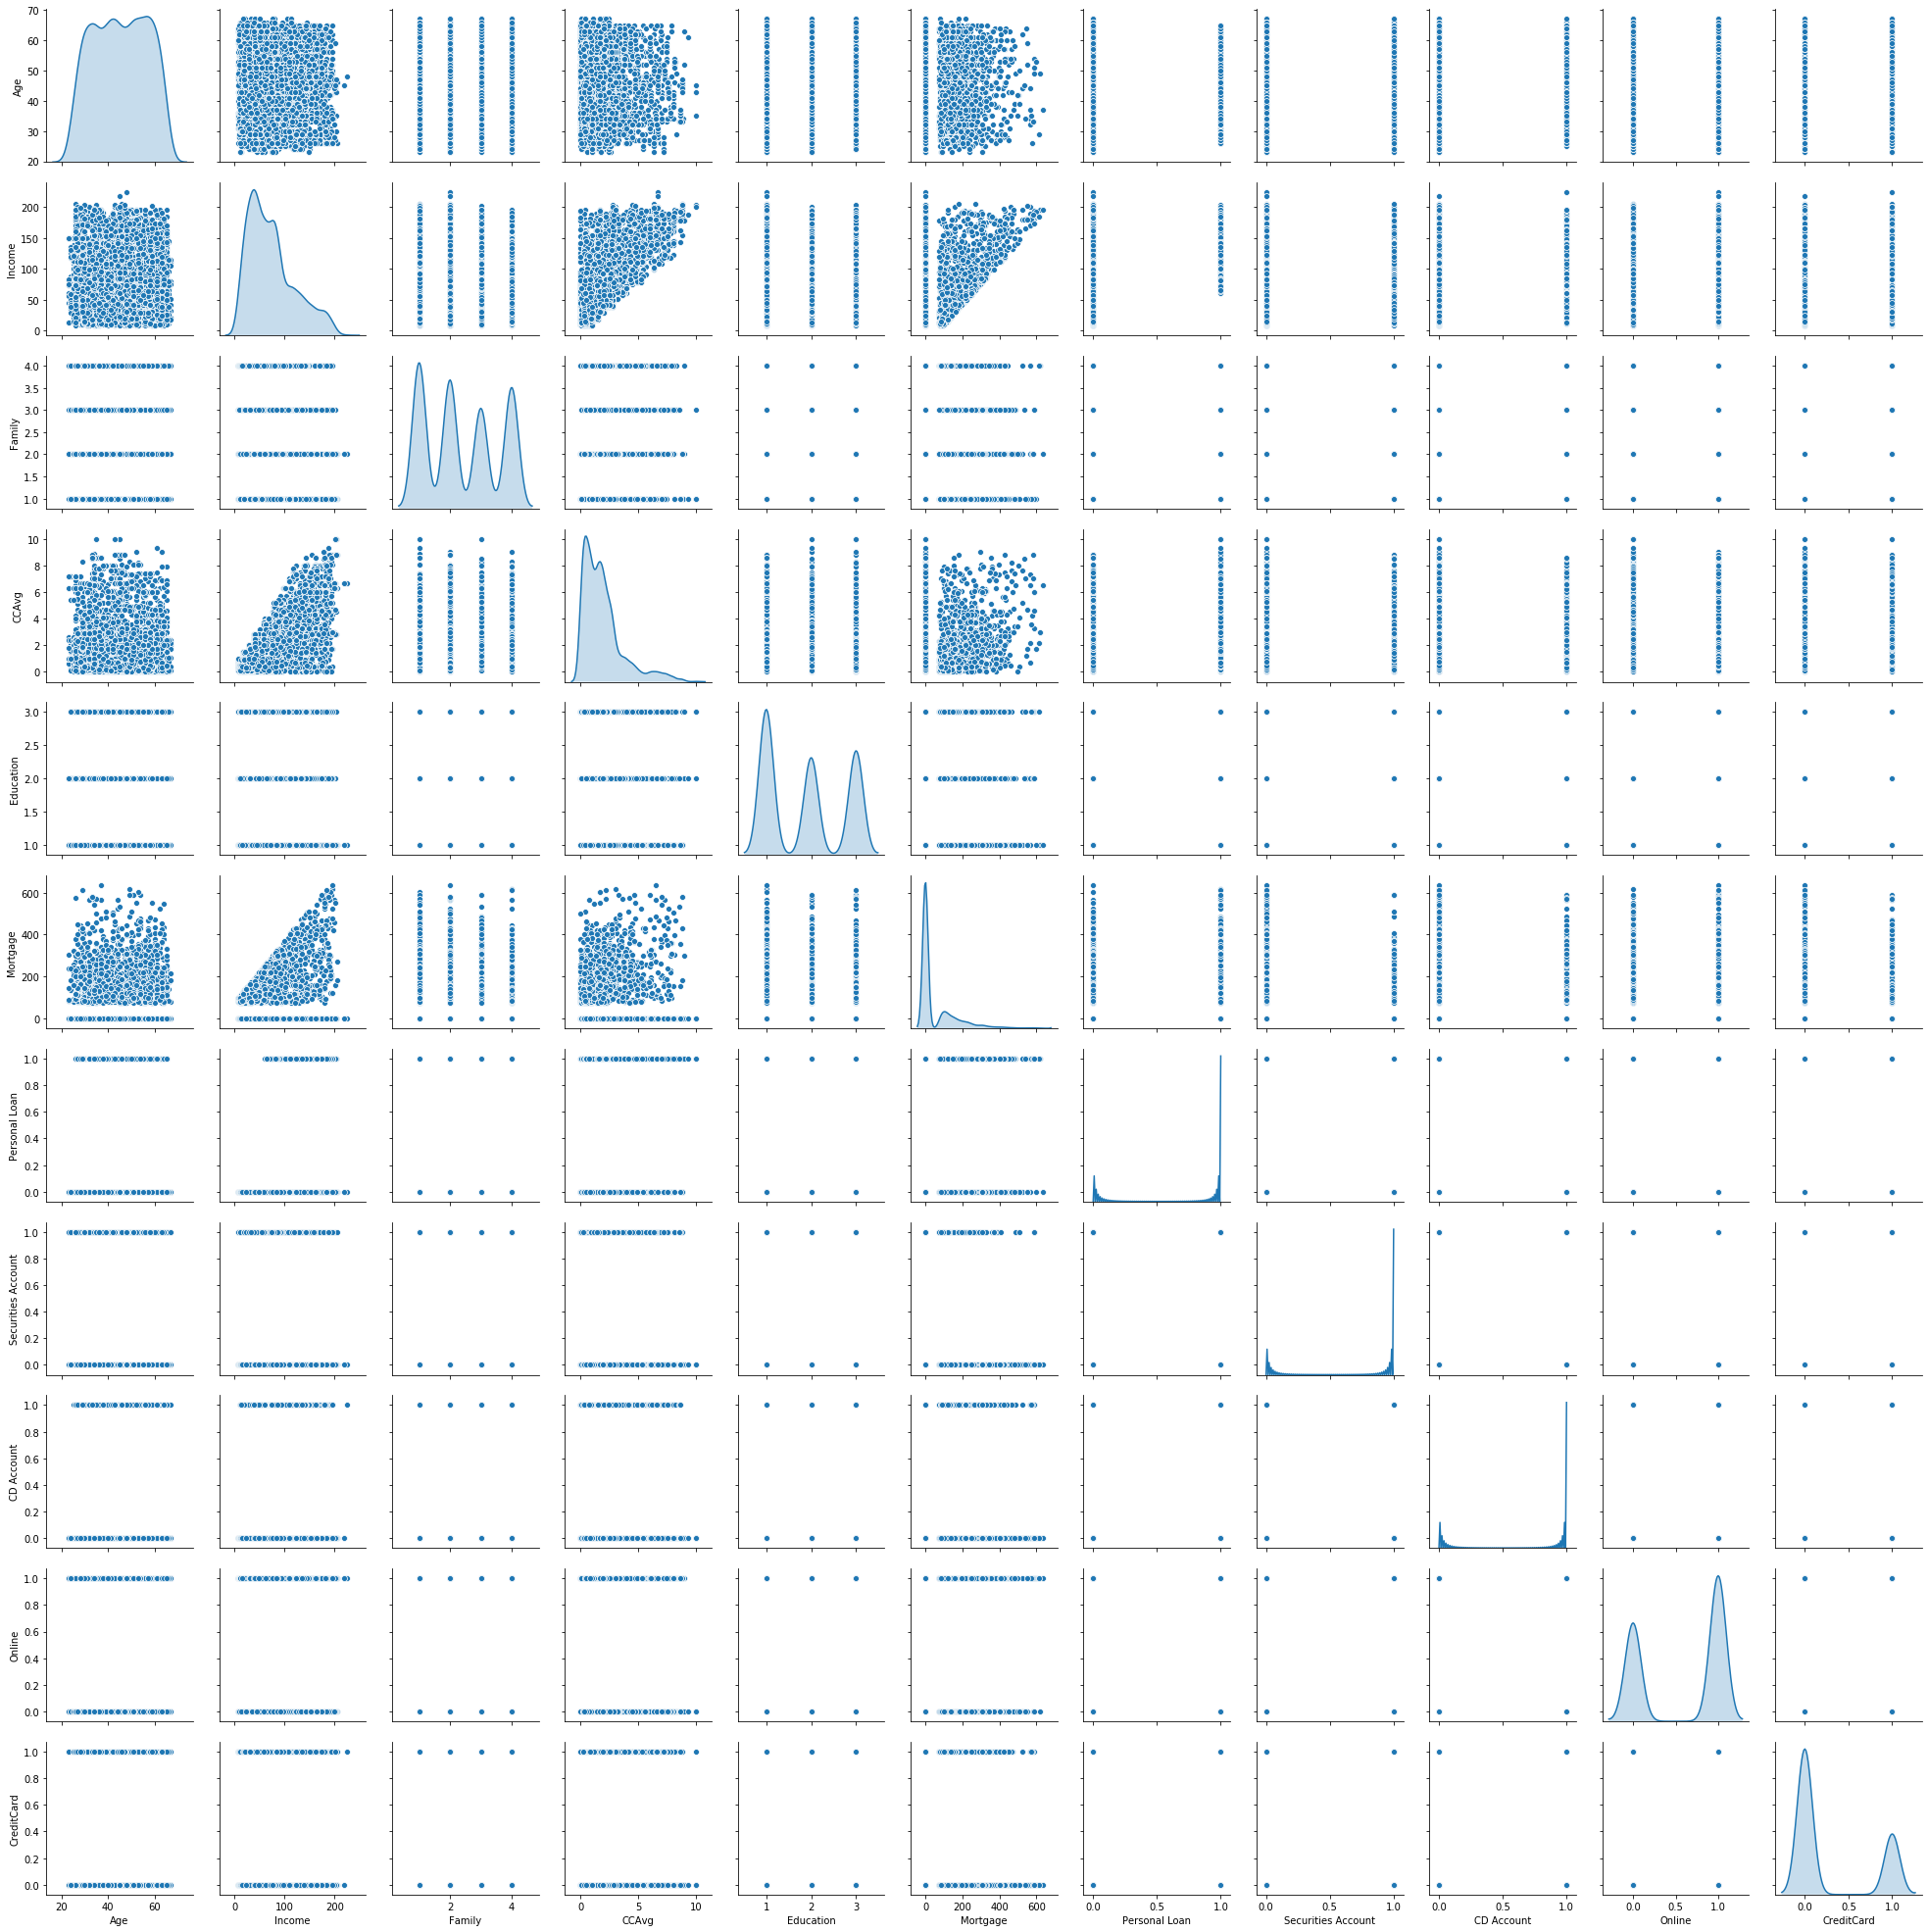

In [156]:
#Question:1
sns.pairplot(bankdata,diag_kind='kde')

In [157]:
#Question:1
bankdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
Age                   5000 non-null int64
Income                5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null category
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: category(1), float64(1), int64(9)
memory usage: 395.7 KB


In [237]:
#Question:1
bankdata.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0
Online,5000.0,0.596800,0.490589,0.0,0.0,1.0,1.0,1.0
CreditCard,5000.0,0.294000,0.455637,0.0,0.0,0.0,1.0,1.0
Education_graduate,5000.0,0.280600,0.449337,0.0,0.0,0.0,1.0,1.0


In [234]:
# Replacing values with 1: 'undergrad', 2: 'graduate', 3: 'professional
bankdata['Education'] = bankdata['Education'].replace({1: 'undergrad', 2: 'graduate', 3: 'professional'})
bankdata.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,undergrad,0,0,1,0,0,0
1,45,34,3,1.5,undergrad,0,0,1,0,0,0
2,39,11,1,1.0,undergrad,0,0,0,0,0,0
3,35,100,1,2.7,graduate,0,0,0,0,0,0
4,35,45,4,1.0,graduate,0,0,0,0,0,1


In [235]:
# one hot encoding 
bankdata = pd.get_dummies(bankdata, columns=['Education'])
bankdata.head()

,Age,Income,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_graduate,Education_professional,Education_undergrad
0,25,49,4,1.6,0,0,1,0,0,0,0,0,1
1,45,34,3,1.5,0,0,1,0,0,0,0,0,1
2,39,11,1,1.0,0,0,0,0,0,0,0,0,1
3,35,100,1,2.7,0,0,0,0,0,0,1,0,0
4,35,45,4,1.0,0,0,0,0,0,1,1,0,0


In [ ]:
#

In [249]:
#Question:2 
# Data distubution of traget cloumn: we can find more difference between people who accepted personal loans in terems of  their respective CCAvg, Mortgage, Income Education
bankdata.groupby(["Personal Loan"]).mean()

,Age,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,
0,45.367257,66.237389,2.373451,1.729009,1.843584,51.789381,0.102212,0.035841,0.595796,0.293584
1,45.066667,144.745833,2.612500,3.905354,2.233333,100.845833,0.125000,0.291667,0.606250,0.297917


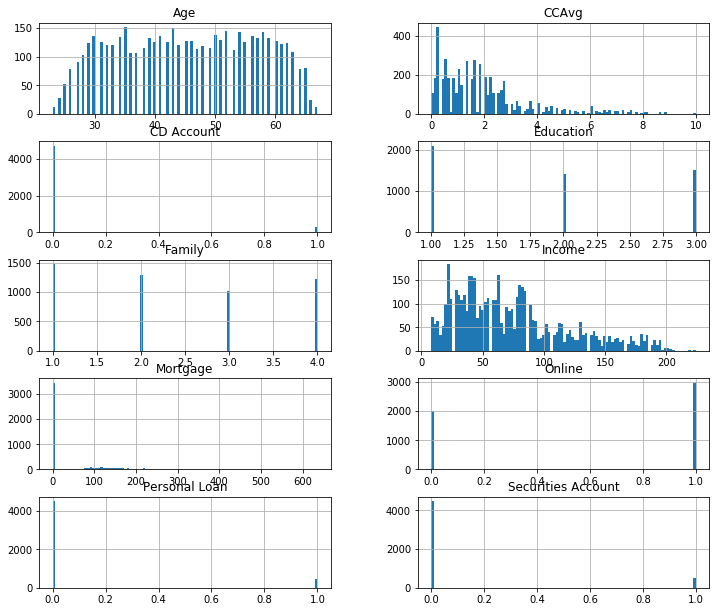

In [248]:
#Question:1 Data distubution of input columns
columns = list(bankdata)[0:-1] # 
pdata[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2)); 
# Histogram

#Question:1 Data distubution of input columns and comments

1.based on our findings experience and age are highly correlated
so for handling native values in experience column, we droped experience column by keeping Age column
2.Age is almost normally distributed. this bank contains almost all age groups people, starting from 23 to 60 years.

3.Here in dateset, mortgage column is highly left skewed and it tells a few people have taken mortgage from this bank
4.Avg spending on credit column also left skewed. Avg spending on credit card by people is less compare more spending side
5.High income people is less than low income people

6.almost all age group people are using credit card issued by universal bank but ratio is higher for people who use than who doesn't use
7.Almost all age group people use internet banking but ratio is higher for people who use than who doesn't use
8.Most of people not having CD Account in this bank ratio is low for people who has CD Account than who doesn't have
9.Most of people not having Securities Account in this bank ratio is low for people who has Securities Account than who doesn't have



# Logistic regression

In [163]:
#Question :4 Data split 70:30
from sklearn.model_selection import train_test_split

X = bankdata.drop('Personal Loan',axis=1)     # Predictor feature columns (8 X m)
Y = bankdata['Personal Loan']   # Predicted class (1=True, 0=False) (1 X m)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
# 1 is just any random seed number

x_train.head()

,Age,Income,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Education_graduate,Education_professional,Education_undergrad
1334,47,35,2,1.3,0,0,0,1,0,0,0,1
4768,38,39,1,2.0,0,0,0,1,0,1,0,0
65,59,131,1,3.8,0,0,0,1,1,0,0,1
177,29,65,4,1.8,244,0,0,0,0,1,0,0
4489,39,21,3,0.2,0,0,0,1,0,1,0,0


In [164]:
## chcking split of data 
print("{0:0.2f}% data is in training set".format((len(x_train)/len(pdata.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(pdata.index)) * 100))

70.00% data is in training set
30.00% data is in test set


In [165]:
## now lets check loans 0/1 in split data
print("Original Loan 1 Values    : {0} ({1:0.2f}%)".format(len(bankdata.loc[bankdata['Personal Loan'] == 1]), (len(bankdata.loc[bankdata['Personal Loan'] == 1])/len(bankdata.index)) * 100))
print("Original Loan 0 Values   : {0} ({1:0.2f}%)".format(len(bankdata.loc[bankdata['Personal Loan'] == 0]), (len(bankdata.loc[bankdata['Personal Loan'] == 0])/len(bankdata.index)) * 100))
print("")
print("Training Loan 1 Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Loan 0 Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Loan 1 Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Loan 0 Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Loan 1 Values    : 480 (9.60%)
Original Loan 0 Values   : 4520 (90.40%)

Training Loan 1 Values    : 331 (9.46%)
Training Loan 0 Values   : 3169 (90.54%)

Test Loan 1 Values        : 149 (9.93%)
Test Loan 0 Values       : 1351 (90.07%)



In [282]:
#Question:5
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)
#predict on test
y_predict = model.predict(x_test)


coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0         1         2         3         4         5         6  \
0 -0.012435  0.049219  0.442748  0.173599  0.000749 -0.876091  3.150075   

          7         8         9       10        11  intercept  
0 -0.619406 -0.896127 -0.967472 -0.88309 -4.253975  -6.104536  


In [167]:
model_score_train = model.score(x_train, y_train)
print(model_score_train)

0.9588571428571429


In [168]:
model_score_test = model.score(x_test, y_test)
print(model_score_test)

0.9546666666666667


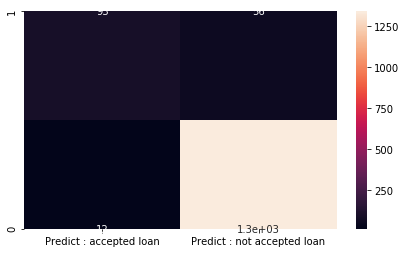

In [250]:
cm_logistic=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm_logistic = pd.DataFrame(cm_logistic, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict : accepted loan","Predict : not accepted loan"]])
plt.figure(figsize = (7,4))
sns.heatmap(df_cm_logistic, annot=True)

In [251]:
cm_logistic

array([[  93,   56],
       [  12, 1339]], dtype=int64)

In [252]:
print("Classification Report for logistic regression ")
print(metrics.classification_report(y_test, y_predict, labels=[1, 0]))

Classification Report for logistic regression 
              precision    recall  f1-score   support

           1       0.89      0.62      0.73       149
           0       0.96      0.99      0.98      1351

    accuracy                           0.95      1500
   macro avg       0.92      0.81      0.85      1500
weighted avg       0.95      0.95      0.95      1500



# Using NaiveBayes 

In [253]:

X_NB = bankdata.drop('Personal Loan',axis=1)     # Predictor feature columns (8 X m)

Y_NB = bankdata['Personal Loan']   # Predicted class (1=True, 0=False) (1 X m)

x_train_nb, x_test_nb, y_train_nb, y_test_nb = train_test_split(X_NB, Y_NB, test_size=0.3, random_state=1)
# 1 is just any random seed number

x_train_nb.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
1334,47,35,2,1.3,1,0,0,0,1,0
4768,38,39,1,2.0,2,0,0,0,1,0
65,59,131,1,3.8,1,0,0,0,1,1
177,29,65,4,1.8,2,244,0,0,0,0
4489,39,21,3,0.2,2,0,0,0,1,0


In [254]:
print("{0:0.2f}% data is in training set".format((len(x_train_nb)/len(bankdata.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test_nb)/len(bankdata.index)) * 100))

70.00% data is in training set
30.00% data is in test set


# Train Naive Bayes algorithm

In [256]:
#Question:5
from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes

# creatw the model
loan_model = GaussianNB()

loan_model.fit(x_train_nb, y_train_nb.ravel())

C:\Users\NARESH PAMIDI\Anaconda3\lib\site-packages\pandas\core\series.py:628: FutureWarning: Categorical.ravel will return a Categorical object instead of an ndarray in a future version.
  return self._values.ravel(order=order)


GaussianNB(priors=None, var_smoothing=1e-09)

# performance of our model with training data

In [257]:
loan_train_predict = loan_model.predict(x_train_nb)

from sklearn import metrics

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train_nb, loan_train_predict)))
print()

Model Accuracy: 0.8894



# performance of our model with training data

In [258]:
loan_test_predict = loan_model.predict(x_test_nb)

from sklearn import metrics

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test_nb, loan_test_predict)))
print()

Model Accuracy: 0.8747



Lets check the confusion matrix and classification report

Confusion Matrix Naive Bayes


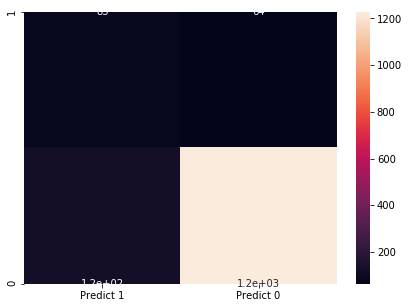

In [259]:
print("Confusion Matrix Naive Bayes")
cm_nb=metrics.confusion_matrix(y_test_nb, loan_test_predict, labels=[1, 0])

df_cm_nb = pd.DataFrame(cm_nb, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm_nb, annot=True)

In [260]:
cm_nb

array([[  85,   64],
       [ 124, 1227]], dtype=int64)

In [261]:
print("Classification Report for naiveBayes ")
print(metrics.classification_report(y_test_nb, loan_test_predict, labels=[1, 0]))

Classification Report for naiveBayes 
              precision    recall  f1-score   support

           1       0.41      0.57      0.47       149
           0       0.95      0.91      0.93      1351

    accuracy                           0.87      1500
   macro avg       0.68      0.74      0.70      1500
weighted avg       0.90      0.87      0.88      1500



# KNN 

In [262]:
X_KNN = bankdata.drop('Personal Loan',axis=1)     # Predictor feature columns (8 X m)

Y_KNN = bankdata['Personal Loan']   # Predicted class (1=True, 0=False) (1 X m)

x_train_knn, x_test_knn, y_train_knn, y_test_knn = train_test_split(X_KNN, Y_KNN, test_size=0.3, random_state=1)
# 1 is just any random seed number

x_train_knn.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
1334,47,35,2,1.3,1,0,0,0,1,0
4768,38,39,1,2.0,2,0,0,0,1,0
65,59,131,1,3.8,1,0,0,0,1,1
177,29,65,4,1.8,2,244,0,0,0,0
4489,39,21,3,0.2,2,0,0,0,1,0


In [263]:
print("{0:0.2f}% data is in training set".format((len(x_train_knn)/len(bankdata.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test_knn)/len(bankdata.index)) * 100))

70.00% data is in training set
30.00% data is in test set


Build kNN Model

In [264]:
#so here K is 39 and it is going permonace by looking at graph 
#and test records =1500 (30%)
np.sqrt(1500)

38.72983346207417

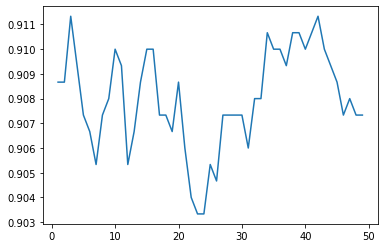

In [265]:
#Question:5
scores =[]
for k in range(1,50):
    NNH_FOR_K = KNeighborsClassifier(n_neighbors = k, weights = 'distance' )
    NNH_FOR_K.fit(x_train_knn, y_train_knn)
    scores.append(NNH_FOR_K.score(x_test_knn, y_test_knn))
plt.plot(range(1,50),scores)

In [267]:
from sklearn.neighbors import KNeighborsClassifier
NNH = KNeighborsClassifier(n_neighbors= 39 , weights = 'distance' )
NNH

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=39, p=2,
                     weights='distance')

In [268]:
# Call Nearest Neighbour algorithm

NNH.fit(x_train_knn, y_train_knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=39, p=2,
                     weights='distance')

# Evaluate Performance of kNN Model

In [269]:
# For every test data point, predict it's label based on 5 nearest neighbours in this model. The majority class will 
# be assigned to the test data point

knn_predicted_labels = NNH.predict(x_test_knn)
NNH.score(x_test_knn, y_test_knn)

0.9106666666666666

Confusion Matrix for knn


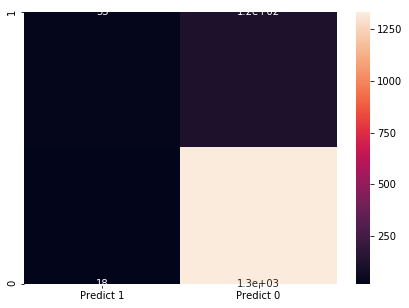

In [270]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics

print("Confusion Matrix for knn")
cm_knn=metrics.confusion_matrix(y_test_knn, knn_predicted_labels, labels=[1,0])

df_cm_knn = pd.DataFrame(cm_knn, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm_knn, annot=True)

In [271]:
cm_knn

array([[  33,  116],
       [  18, 1333]], dtype=int64)

In [272]:
print("Classification Report for knn")
print(metrics.classification_report(y_test_knn, knn_predicted_labels, labels=[1, 0]))

Classification Report for knn
              precision    recall  f1-score   support

           1       0.65      0.22      0.33       149
           0       0.92      0.99      0.95      1351

    accuracy                           0.91      1500
   macro avg       0.78      0.60      0.64      1500
weighted avg       0.89      0.91      0.89      1500



In [273]:
#Question :6

In [274]:
cm_logistic

array([[  93,   56],
       [  12, 1339]], dtype=int64)

In [275]:
cm_knn

array([[  33,  116],
       [  18, 1333]], dtype=int64)

In [276]:
cm_nb

array([[  85,   64],
       [ 124, 1227]], dtype=int64)

In [277]:
#Question:7

In [278]:
# by looking at below accuracy  , precision recall and f1-score, Logistic regression is the best model in this case

In [279]:
print("Classification Report for logistic regression ")
print(metrics.classification_report(y_test, y_predict, labels=[1, 0]))

Classification Report for logistic regression 
              precision    recall  f1-score   support

           1       0.89      0.62      0.73       149
           0       0.96      0.99      0.98      1351

    accuracy                           0.95      1500
   macro avg       0.92      0.81      0.85      1500
weighted avg       0.95      0.95      0.95      1500



In [280]:
print("Classification Report for naiveBayes ")
print(metrics.classification_report(y_test_nb, loan_test_predict, labels=[1, 0]))

Classification Report for naiveBayes 
              precision    recall  f1-score   support

           1       0.41      0.57      0.47       149
           0       0.95      0.91      0.93      1351

    accuracy                           0.87      1500
   macro avg       0.68      0.74      0.70      1500
weighted avg       0.90      0.87      0.88      1500



In [281]:
print("Classification Report for knn")
print(metrics.classification_report(y_test_knn, knn_predicted_labels, labels=[1, 0]))

Classification Report for knn
              precision    recall  f1-score   support

           1       0.65      0.22      0.33       149
           0       0.92      0.99      0.95      1351

    accuracy                           0.91      1500
   macro avg       0.78      0.60      0.64      1500
weighted avg       0.89      0.91      0.89      1500



In [1]:
##Testing started .....